In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Data: 10 samples, 4 features
data = np.array([
    [2.5, 2.4, 0.5, 1.2],
    [0.5, 0.7, -0.3, -0.8],
    [2.2, 2.9, 0.8, 1.6],
    [1.9, 2.2, 0.2, 0.8],
    [3.1, 3.0, 1.0, 2.2],
    [2.3, 2.7, 0.3, 1.3],
    [2.0, 1.6, -0.2, 0.4],
    [1.0, 1.1, -0.8, -0.2],
    [1.5, 1.6, -0.5, 0.1],
    [1.1, 0.9, -1.0, -0.5]
])

In [3]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

In [13]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
data_pca = pca.fit_transform(data_standardized)

# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Transformed data
print("Reduced Data:\n", data_pca)

Explained Variance Ratio: [0.94316642 0.04082969]
Reduced Data:
 [[ 1.476402   -0.04999544]
 [-2.64327336  0.93659534]
 [ 2.04425406  0.4977606 ]
 [ 0.50106965  0.13757059]
 [ 3.18966724 -0.08499813]
 [ 1.43548742 -0.15080576]
 [-0.33908075 -0.36530203]
 [-2.10945388 -0.18042551]
 [-1.06644129 -0.27875532]
 [-2.48863108 -0.46164435]]


PCi1 = Vi1 * x1 + Vi2 * x2 + Vi3 * x3 + Vi4 * x4

In [14]:
eigenvectors = pca.components_
eigenvectors

array([[ 0.49402134,  0.50697296,  0.48643111,  0.51215829],
       [-0.61446635, -0.01892501,  0.77829913, -0.12776314]])

#Classification with dimensionally reduced data

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
# Sample n*6 matrix (n samples, 5 features + 1 target variable)
data = np.array([
    [2.5, 2.4, 0.5, 1.2, 3.1, 0],
    [0.5, 0.7, -0.3, -0.8, 1.0, 1],
    [2.2, 2.9, 0.8, 1.6, 2.7, 0],
    [1.9, 2.2, 0.2, 0.8, 2.3, 0],
    [3.1, 3.0, 1.0, 2.2, 3.5, 1],
    [2.3, 2.7, 0.3, 1.3, 3.0, 0],
    [2.0, 1.6, -0.2, 0.4, 2.2, 1],
    [1.0, 1.1, -0.8, -0.2, 1.3, 1],
    [1.5, 1.6, -0.5, 0.1, 1.8, 0],
    [1.1, 0.9, -1.0, -0.5, 1.0, 1]
])

In [17]:
# Separate features and target
X = data[:, :-1]  # First 5 columns (features)
y = data[:, -1]   # 6th column (target)

# Step 1: Standardize the data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [18]:
# Step 2: Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

In [28]:
# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [29]:
# Step 4: Train a classifier (Random Forest in this case)
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Step 5: Make predictions and evaluate
y_pred = classifier.predict(X_test)

# Print accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2
Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         3
         1.0       0.25      0.50      0.33         2

    accuracy                           0.20         5
   macro avg       0.12      0.25      0.17         5
weighted avg       0.10      0.20      0.13         5



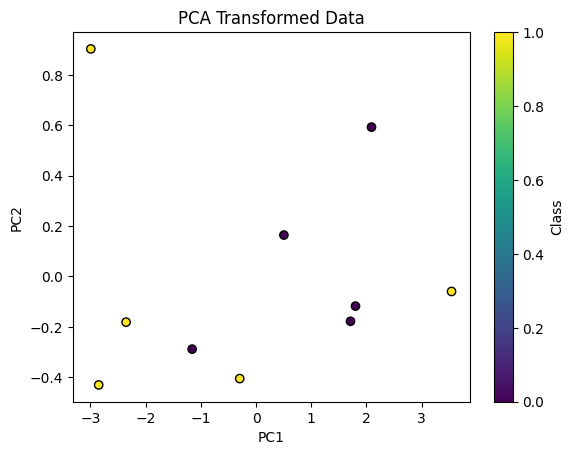

In [22]:
import matplotlib.pyplot as plt

# Plot the PCA-transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Transformed Data")
plt.colorbar(label="Class")
plt.show()
